# Simon's Algorithm

In this section, we first introduce the Simon problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run on a simulator and device.


## Contents

1. [Introduction](#introduction)     
   1.1 [Simon's Problem](#problem)    
   1.2 [Simon's Algorithm](#algorithm)
2. [Example](#example)
3. [Qiskit Implementation](#implementation)     
   3.1 [Simulation](#simulation)     
   3.2 [Device](#device)     
4. [Oracle](#oracle)
5. [Problems](#problems)
6. [References](#references)

## 1. Introduction <a id='introduction'></a>

Simon's algorithm, first introduced in Reference [1], was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithms based on the quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

### 1a. Simon's Problem <a id='problem'> </a>

We are given an unknown blackbox function $f$, which is guaranteed to be either one-to-one ($1:1$) or two-to-one ($2:1$), where one-to-one and two-to-one functions have the following properties:

- **one-to-one**: maps exactly one unique output for every input. An example with a function that takes 4 inputs is:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$$

- **two-to-one**: maps exactly two inputs to every unique output. An example with a function that takes 4 inputs is:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2$$

This two-to-one mapping is according to a hidden bitstring, $b$, where:

$$
\textrm{given }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{it is guaranteed }: \quad x_1 \oplus x_2 = b
$$

Given this blackbox $f$, how quickly can we determine if $f$ is one-to-one or two-to-one? Then, if $f$ turns out to be two-to-one, how quickly can we determine $b$? As it turns out, both cases boil down to the same problem of finding $b$, where a bitstring of $b={000...}$ represents the one-to-one $f$.

### 1b. Simon's Algorithm <a id='algorithm'> </a>

#### Classical Solution

Classically, if we want to know what $b$ is with 100% certainty for a given $f$, we have to check up to $2^{n−1}+1$  inputs, where n is the number of bits in the input. This means checking just over half of all the possible inputs until we find two cases of the same output. Much like the Deutsch-Jozsa problem, if we get lucky, we could solve the problem with our first two tries. But if we happen to get an $f$ that is one-to-one, or get _really_ unlucky with an $f$ that’s two-to-one, then we’re stuck with the full $2^{n−1}+1$.
There are known algorithms that have a lower bound of $\Omega(2^{n/2})$ (see Reference 2 below), but generally speaking the complexity grows exponentially with n.

#### Quantum Solution

The quantum circuit that implements Simon's algorithm is shown below.

![image1](images/simon_steps.jpeg)

Where the query function, $\text{Q}_f$ acts on two quantum registers as:


$$ \lvert x \rangle \lvert a \rangle \rightarrow \lvert x \rangle \lvert a \oplus f(x) \rangle $$

In the specific case that the second register is in the state $|0\rangle = |00\dots0\rangle$ we have:

$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

The algorithm involves the following steps.
<ol>
   <li> Two $n$-qubit input registers are initialized to the zero state: 
    

$$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

 </li>
    
   <li> Apply a Hadamard transform to the first register:
    

$$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

 
   </li>
    
   <li> Apply the query function $\text{Q}_f$: 
    

$$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle  $$

 
   </li>
    
   <li> Measure the second register. A certain value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y = x \oplus b $. Therefore the first register becomes:
    

$$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$


   where we omitted the second register since it has been measured. 
   </li>
    
   <li> Apply Hadamard on the first register:
    

$$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$


   </li>
    
   <li> Measuring the first register will give an output only if:
    

$$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$


   which means:
    $$ x \cdot z = y \cdot z \\
     x \cdot z = \left( x \oplus b \right) \cdot z \\
     x \cdot z = x \cdot z \oplus b \cdot z \\
     b \cdot z = 0 \text{ (mod 2)} $$
      
   A string $z$ will be measured, whose inner product with $b = 0$. Thus, repeating the algorithm $\approx n$ times, we will be able to obtain $n$ different values of $z$ and the following system of equation can be written:
       
    

$$ \begin{cases} b \cdot z_1 = 0 \\ b \cdot z_2 = 0 \\ \quad \vdots \\ b \cdot z_n = 0 \end{cases}$$


       
   From which $b$ can be determined, for example by Gaussian elimination.
    </li>
</ol>

So, in this particular problem the quantum algorithm performs exponentially fewer steps than the classical one. Once again, it might be difficult to envision an application of this algorithm (although it inspired the most famous algorithm created by Shor) but it represents the first proof that there can be an exponential speed-up in solving a specific problem by using a quantum computer rather than a classical one.

## 2. Example  <a id='example'></a>

Let's see the example of Simon's algorithm for 2 qubits with the secret string $b=11$, so that $f(x) = f(y)$ if $y = x \oplus b$. The quantum circuit to solve the problem is:

![image2](images/simon_example.jpeg)

<ol>
    <li> Two $2$-qubit input registers are initialized to the zero state:
    

$$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> Apply Hadamard gates to the qubits in the first register:
    

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> For the string $b=11$, the query function can be implemented as $\text{Q}_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}$ (as seen in the circuit diagram above):
    
$$
\begin{aligned}
\lvert \psi_3 \rangle  = \frac{1}{2} ( \; 
  & \lvert 0 0 \rangle_1 \; \lvert 0\oplus 0 \oplus 0, & 0 \oplus 0 \oplus 0 \rangle_2 &\\[5pt]
+ & \lvert 0 1 \rangle_1 \; \lvert 0\oplus 0 \oplus 1, & 0 \oplus 0 \oplus 1 \rangle_2 &\\[6pt]
+ & \lvert 1 0 \rangle_1 \; \lvert 0\oplus 1 \oplus 0, & 0 \oplus 1 \oplus 0 \rangle_2 &\\[6pt]
+ & \lvert 1 1 \rangle_1 \; \lvert 0\oplus 1 \oplus 1, & 0 \oplus 1 \oplus 1 \rangle_2 & \; )\\
\end{aligned}
$$
  
Thus:    

$$ 
\begin{aligned} 
\lvert \psi_3 \rangle = \frac{1}{2} ( \quad
& \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 & \\[6pt]
+ & \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 & \\[6pt]
+ & \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 & \\[6pt]
+ & \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 & \; )\\
\end{aligned}
$$    
   </li>
    
   <li> We measure the second register. With $50\%$ probability we will see either $\lvert  0   0  \rangle_2$ or $\lvert  1   1  \rangle_2$. For the sake of the example, let us assume that we see $\lvert  1   1  \rangle_2$. The state of the system is then
    

$$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$


    
   where we omitted the second register since it has been measured.
    
   </li>
    
    
    
   <li> Apply Hadamard on the first register
    $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle   + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$
    
   </li>
    
   <li> Measuring the first register will give either $\lvert 0 0 \rangle$ or $\lvert 1 1 \rangle$ with equal probability. 
    </li>
    <li>
    If we see $\lvert 1 1 \rangle$, then:   
    

$$ b \cdot 11 = 0 $$

which tells us that $b \neq 01$ or $10$, and the two remaining potential solutions are $b = 00$ or $b = 11$. Note that $b = 00$ will always be a trivial solution to our simultaneous equations. If we repeat steps 1-6 many times, we would only measure $|00\rangle$ or $|11\rangle$ as

$$ b \cdot 11 = 0 $$
$$ b \cdot 00 = 0 $$
        
are the only equations that satisfy $b=11$. We can verify $b=11$ by picking a random input ($x_i$) and checking $f(x_i) = f(x_i \oplus b)$. For example:

$$ 01 \oplus b = 10 $$
$$ f(01) = f(10) = 11$$

   </li>
</ol>

## 3. Qiskit Implementation <a id='implementation'></a>

We now implement Simon's algorithm for an example with $3$-qubits and $b=110$.

In [6]:
# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

The function `simon_oracle` (imported above) creates a Simon oracle for the bitstring `b`. This is given without explanation, but we will discuss the method in [section 4](#oracle).

In Qiskit, measurements are only allowed at the end of the quantum circuit. In the case of Simon's algorithm, we actually do not care about the output of the second register, and will only measure the first register.

In [101]:
b = '1100'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

┌───┐ ░                                ░ ┌───┐┌─┐         
q_0: ┤ H ├─░───■────────────────────────────░─┤ H ├┤M├─────────
     ├───┤ ░   │                            ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├─░───┼────■───────────────────────░─┤ H ├─╫─┤M├──────
     ├───┤ ░   │    │                       ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■─────────■────■───░─┤ H ├─╫──╫─┤M├───
     ├───┤ ░   │    │    │         │    │   ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■────┼────┼───░─┤ H ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │    │   ░ └───┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼───░───────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │    │    │   ░       ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫──╫─
           ░           └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├─────┤ X ├─░───────╫──╫──╫──╫─
           ░                └───┘     └───┘ ░       ║  ║  ║  ║ 
c_0: ═══════════════════════════════════════════════╩══╬══╬══╬═
                                                       ║  ║  ║ 
c_1: ══════════════════════════════════════════════════╩══╬══╬═
                                                          ║  ║ 
c_2: ═════════════════════════════════════════════════════╩══╬═
                                                             ║ 
c_3: ════════════════════════════════════════════════════════╩═

### 3a. Experiment with Simulators  <a id='simulation'></a>

We can run the above circuit on the simulator. 

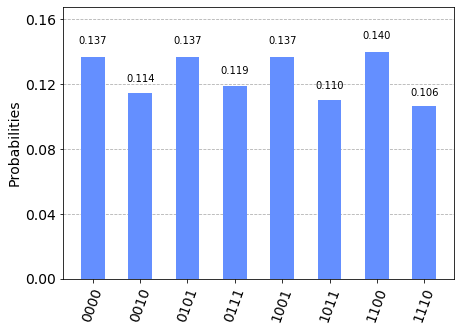

In [87]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

Since we know $b$ already, we can verify these results do satisfy $b\cdot z  = 0 \pmod{2}$:

In [88]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

1101.0111 = 0 (mod 2)
1101.1100 = 0 (mod 2)
1101.1110 = 0 (mod 2)
1101.1001 = 0 (mod 2)
1101.0010 = 0 (mod 2)
1101.0101 = 0 (mod 2)
1101.0000 = 0 (mod 2)
1101.1011 = 0 (mod 2)


Using these results, we can recover the value of $b = 110$ by solving this set of simultaneous equations. For example, say we first measured `001`, this tells us:

$$
\require{cancel}
\begin{aligned}
b \cdot 001 &= 0 \\
(b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 0) & = 0 \\
(\cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) & = 0 \\
b_0 & = 0\\
\end{aligned}
$$

If we next measured `111`, we have:

$$
\require{cancel}
\begin{aligned}
b \cdot 111 &= 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) & = 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) & = 0 \\
\end{aligned}
$$

Which tells us either:

$$ b_2 = b_1 = 0, \quad b = 000 $$

or 

$$ b_2 = b_1 = 1, \quad b = 110 $$

Of which $b  = 110$ is the non-trivial solution to our simultaneous equations. We can solve these problems in general using [Gaussian elimination](https://mathworld.wolfram.com/GaussianElimination.html), which has a run time of $O(n^3)$.

### 3b. Experiment with Real Devices  <a id='device'></a>

The circuit in [section 3a](#simulation) uses $2n = 6$ qubits, while at the time of writing many IBM Quantum devices only have 5 qubits. We will run the same code, but instead using $b=11$ as in the example in section 2, requiring only 4 qubits.

In [10]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 += simon_oracle(b)

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

┌───┐                         ┌───┐┌─┐
q_0: ┤ H ├──■─────────■─────────■──┤ H ├┤M├
     ├───┤  │         │  ┌───┐  │  └┬─┬┘└╥┘
q_1: ┤ H ├──┼────■────┼──┤ H ├──┼───┤M├──╫─
     └───┘┌─┴─┐  │  ┌─┴─┐└───┘  │   └╥┘  ║ 
q_2: ─────┤ X ├──┼──┤ X ├───────┼────╫───╫─
          └───┘┌─┴─┐└───┘     ┌─┴─┐  ║   ║ 
q_3: ──────────┤ X ├──────────┤ X ├──╫───╫─
               └───┘          └───┘  ║   ║ 
c_0: ════════════════════════════════╬═══╩═
                                     ║     
c_1: ════════════════════════════════╩═════

This circuit is slightly different to the circuit shown in [section 2](#example). The outputs are different, but the input collisions are the same, i.e. both have the property that $f(x) = f(x \oplus 11)$.

least busy backend:  ibmq_burlington
Job Status: job has successfully run


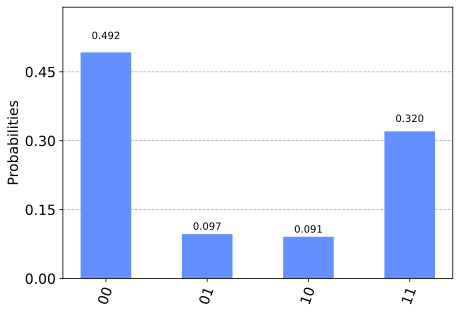

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit_2, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)

# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [7]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (49.2%)
11.11 = 0 (mod 2) (32.0%)
11.10 = 1 (mod 2) (9.1%)
11.01 = 1 (mod 2) (9.7%)


As we can see, the most significant results are those for which $b\cdot z = 0$ (mod 2). The other results are erroneous, but have a lower probability of occurring. Assuming we are unlikely to measure the erroneous results, we can then use a classical computer to recover the value of $b$ by solving the linear system of equations. For this $n=2$ case, $b = 11$.

## 4. Oracle <a id='oracle'></a>

The above [example](#example) and [implementation](#implementation) of Simon's algorithm are specifically for specific values of $b$. To extend the problem to other secret bit strings, we need to discuss the Simon query function or oracle in more detail.

The Simon algorithm deals with finding a hidden bitstring $b \in \{0,1\}^n$ from an oracle $f_b$ that satisfies $f_b(x) = f_b(y)$ if and only if $y = x \oplus b$ for all $x \in \{0,1\}^n$.  Here, the $\oplus$ is the bitwise XOR operation. Thus, if $b = 0\ldots 0$, i.e., the all-zero bitstring, then $f_b$ is a 1-to-1 (or, permutation) function. Otherwise, if $b \neq 0\ldots 0$, then $f_b$ is a 2-to-1 function. 

In the algorithm, the oracle receives $|x\rangle|0\rangle$ as input. With regards to a predetermined $b$, the oracle writes its output to the second register so that it transforms the input to $|x\rangle|f_b(x)\rangle$ such that $f(x) = f(x\oplus b)$ for all $x \in \{0,1\}^n$. 

Such a blackbox function can be realized by the following procedures.

-  Copy the content of the first register to the second register.
$$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

-  **(Creating 1-to-1 or 2-to-1 mapping)** If $b$ is not all-zero, then there is the least index $j$ so that $b_j = 1$. If $x_j = 0$, then XOR the second register with $b$. Otherwise, do not change the second register.
$$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus b\rangle~\mbox{if}~x_j = 0~\mbox{for the least index j}
$$

-  **(Creating random permutation)** Randomly permute and flip the qubits of the second register.
$$
|x\rangle|y\rangle \rightarrow |x\rangle|f_b(y)\rangle
$$

## 5. Problems <a id='problems'></a>

1. Implement a general Simon oracle using Qiskit.
2. Test your general Simon oracle with the secret bitstring $b=1001$, on a simulator and device. Are the results what you expect? Explain why.

In [160]:
# Exercise 1 
from itertools import permutations 
from random import randrange
import math


def create_permutation(string_b):
    perm_arr = permutations(string_b)
    rand_perm = randrange(math.factorial(n))
    
    final_perm = False
    
    for idx,perm in enumerate(perm_arr):
        if idx == rand_perm:
            final_perm = perm
            
    if(final_perm):
        return final_perm
    else: 
        print("no perm found")

def simon_oracle_test(b):
    
    n = len(b)
    b = b[::-1]
    
    index = -1
    for idx in range(n):
        if b[idx] == '1':
            index = idx
            break
            
    oracle_qc = QuantumCircuit(2*n, n)
    
    # Apply Hadamard gates before querying the oracle
    oracle_qc.h(range(n))    

    # Apply barrier for visual separation
    oracle_qc.barrier()
    
    # First, 
    for i in range(n):
        oracle_qc.cx(i, n+i)
        
    str_arr = []
    if index != -1:      
        for idx in range(n):
            if b[idx] == '1':
                oracle_qc.x(n+idx)
                oracle_qc.cx(index, n+idx)
            print(b[idx])

            str_arr.append(b[idx])
        
    perm = str_arr
    while str_arr == perm:   
        perm = create_permutation(str_arr)
    
    for idx in range(n):
        if(perm[idx] != str_arr[idx]):
            oracle_qc.x( n+idx)
            
    # Apply barrier for visual separation
    oracle_qc.barrier()

    # Apply Hadamard gates to the input register
    oracle_qc.h(range(n))

    # Measure qubits
    oracle_qc.measure(range(n), range(n))
        
   
    return oracle_qc
 

In [161]:
b = '1101'
simon_c = simon_oracle_test(b)

simon_c.draw()

1
0
1
1


┌───┐ ░                                               ░ ┌───┐┌─┐         
q_0: ┤ H ├─░───■────────────────────────■────■─────────■───░─┤ H ├┤M├─────────
     ├───┤ ░   │                        │    │         │   ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├─░───┼────■───────────────────┼────┼─────────┼───░─┤ H ├─╫─┤M├──────
     ├───┤ ░   │    │                   │    │         │   ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■──────────────┼────┼─────────┼───░─┤ H ├─╫──╫─┤M├───
     ├───┤ ░   │    │    │              │    │         │   ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■─────────┼────┼─────────┼───░─┤ H ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │  ┌───┐┌─┴─┐  │  ┌───┐  │   ░ └───┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼──┤ X ├┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │  ├───┤└───┘  │  └───┘  │   ░       ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼──┤ X ├───────┼─────────┼───░───────╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │  ├───┤     ┌─┴─┐       │   ░       ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼──┤ X ├─────┤ X ├───────┼───░───────╫──╫──╫──╫─
           ░           └───┘┌─┴─┐├───┤     └───┘     ┌─┴─┐ ░       ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├┤ X ├───────────────┤ X ├─░───────╫──╫──╫──╫─
           ░                └───┘└───┘               └───┘ ░       ║  ║  ║  ║ 
c_0: ══════════════════════════════════════════════════════════════╩══╬══╬══╬═
                                                                      ║  ║  ║ 
c_1: ═════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                         ║  ║ 
c_2: ════════════════════════════════════════════════════════════════════╩══╬═
                                                                            ║ 
c_3: ═══════════════════════════════════════════════════════════════════════╩═

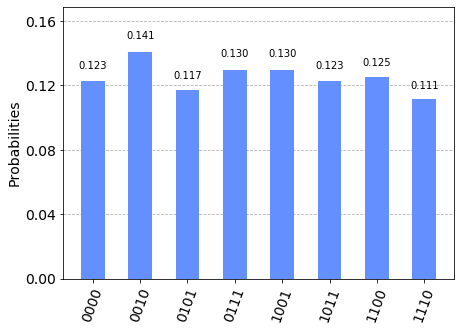

In [162]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_c, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [163]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

1101.0111 = 0 (mod 2)
1101.1001 = 0 (mod 2)
1101.1110 = 0 (mod 2)
1101.0010 = 0 (mod 2)
1101.1100 = 0 (mod 2)
1101.0101 = 0 (mod 2)
1101.0000 = 0 (mod 2)
1101.1011 = 0 (mod 2)


## 6. References <a id='references'></a>

1. Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483, [doi:10.1137/S0097539796298637](https://doi.org/10.1137/S0097539796298637)
2. Guangya Cai and Daowen Qiu. Optimal separation in exact query complexities for Simon's problem. Journal of Computer and System Sciences 97: 83-93, 2018, [https://doi.org/10.1016/j.jcss.2018.05.001](https://doi.org/10.1016/j.jcss.2018.05.001)

In [8]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}